In [1]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn import linear_model
import datetime
import pandas as pd
import pickle        
import numpy as np
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("address_training_set.csv")
np.random.seed(42)

In [3]:
X = data["address"]
y = data["value"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [6]:
tuned_parameters = {'kernel' : ['linear','rbf'],'gamma':[1e-3,1e-4],
                       'C' : [1,10,100,1000]}

In [7]:
#model with gridsearch
clf = GridSearchCV(svm.SVC(),tuned_parameters)

In [8]:
clf.fit(x_train,y_train)

/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
print("Accuracy for test set is:", clf.score(x_train,y_train))

Accuracy for test set is: 0.9591078066914498


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(clf, x_train, y_train, cv=5)
cross_val_score(clf,x_train,y_train, cv=5, scoring="accuracy")

/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

array([0.95987654, 0.93518519, 0.94409938, 0.92857143, 0.94099379])

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_predict)

array([[ 244,   48],
       [  46, 1276]])

In [12]:
y_scores = cross_val_predict(clf, x_train, y_train, cv=5, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
#ROC curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/dhananjayneelakantan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

In [13]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

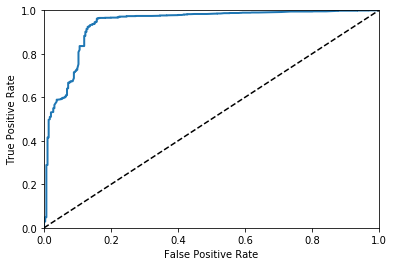

In [14]:
plot_roc_curve(fpr, tpr)
plt.show()

In [15]:
#Compute ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9374546660311275

In [17]:
#Sample text prediction for a one line text - User text case
sample_text = ["Concord 803Ln Allen Tx 7 5002"]
vect = cv.transform(sample_text).toarray()
if clf.predict(vect)==0:
        print("Not address")
else:
        print("This is classified as an address")
        

This is classified as an address


In [18]:
import geocoder #overwriting variables with geolytica package
g1 = geocoder.geolytica(sample_text[0]) 
#Country1 = g1.osm["addr:country"]
#Zip1 = g1.osm["addr:postal"]
State1 = g1.osm["addr:state"]
City1 = g1.osm["addr:city"]
Street1 = g1.osm["addr:street"]
House1 = g1.osm["addr:housenumber"]
Address_final1 = House1 + ',' + Street1 + ',' + City1 + ',' + State1 
print(g1.osm)
print ("Classifier input  : ", sample_text[0])
print ("Address output    : " , Address_final1)

{'x': -79.469952, 'y': 43.810921, 'addr:housenumber': '803', 'addr:street': 'Concord', 'addr:city': 'Vaughan', 'addr:state': 'ON', 'addr:postal': 'L4K4J8'}
Classifier input  :  Concord 803Ln Allen Tx 7 5002
Address output    :  803,Concord,Vaughan,ON


In [19]:
g2 = geocoder.geocodefarm(sample_text[0]) 
Country2 = g2.osm["addr:country"]
Zip2 = g2.osm["addr:postal"]
State2 = g2.osm["addr:state"]
City2 = g2.osm["addr:city"]
#Street2 = g2.osm["addr:street"]
House2 = g2.osm["addr:housenumber"]

Address_final2 = House2  +',' + City2 + ',' + State2 + ',' + Country2 + ',' + Zip2
print(g2.osm)
print ("Classifier input  : ", sample_text[0])
print ("Address output    : " , Address_final2)


{'x': -96.6511583543746, 'y': 33.111542490624, 'addr:housenumber': '803', 'addr:street': 'E Concord Ln', 'addr:city': 'Allen', 'addr:state': 'TX', 'addr:country': 'United States', 'addr:postal': '75002'}
Classifier input  :  Concord 803Ln Allen Tx 7 5002
Address output    :  803,Allen,TX,United States,75002


In [621]:
#Model validation using validation score - 93% accuracy on future models
x_test = cv.transform(X_test)
clf.score(x_test,y_test)

0.9384422110552764